In [1]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
X, y = make_regression(n_samples=1500, n_features=6, n_informative=2)

print(X.shape, y.shape)

(1500, 6) (1500,)


In [3]:
fs = SelectKBest(score_func=f_regression, k=2)

X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1500, 2)


In [5]:
import pandas as pd
df = pd.DataFrame(X)
df_corr = df.corr()
df_corr

,0,1,2,3,4,5
0,1.000000,-0.011390,-0.056664,0.007307,0.027612,0.007369
1,-0.011390,1.000000,0.000890,0.055201,-0.041243,-0.012735
2,-0.056664,0.000890,1.000000,-0.026975,0.004799,-0.005861
3,0.007307,0.055201,-0.026975,1.000000,-0.054096,0.001145
4,0.027612,-0.041243,0.004799,-0.054096,1.000000,0.007618
5,0.007369,-0.012735,-0.005861,0.001145,0.007618,1.000000


<Axes: >

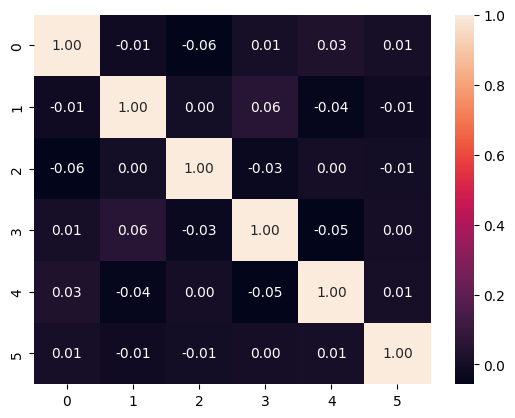

In [7]:
import seaborn as sns
sns.heatmap (df_corr, annot=df_corr, fmt='.2f')

In [8]:
dy = pd.Series(y)
Xy_corr = df.corrwith(dy)
Xy_corr

0    0.024586
1   -0.037945
2   -0.000777
3   -0.037147
4    0.707055
5    0.712524
dtype: float64

In [9]:
print(fs.get_support())

[False False False False  True  True]


In [10]:
print(fs.scores_)

[9.06025377e-01 2.15990955e+00 9.05335404e-04 2.06999141e+00
 1.49756400e+03 1.54480308e+03]


In [11]:
print(fs.pvalues_)

[3.41324759e-001 1.41863010e-001 9.76000247e-001 1.50431264e-001
 1.09709356e-227 8.85662904e-233]


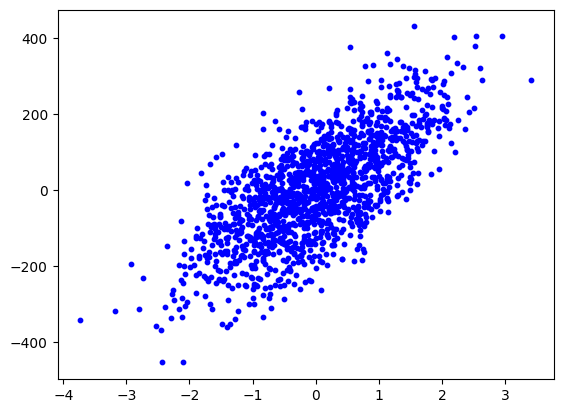

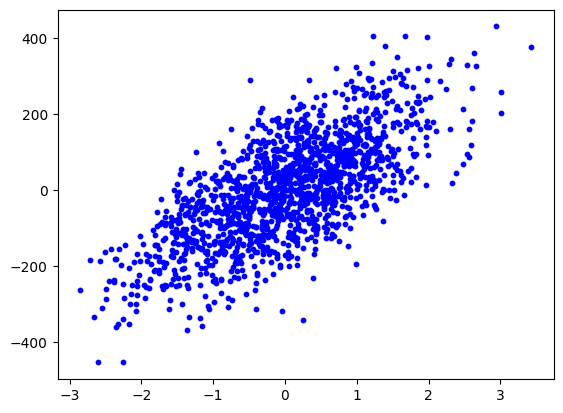

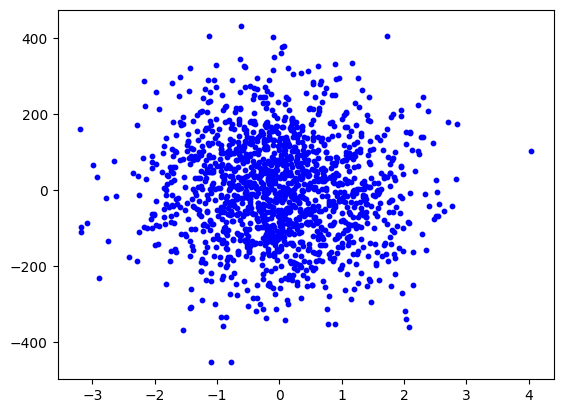

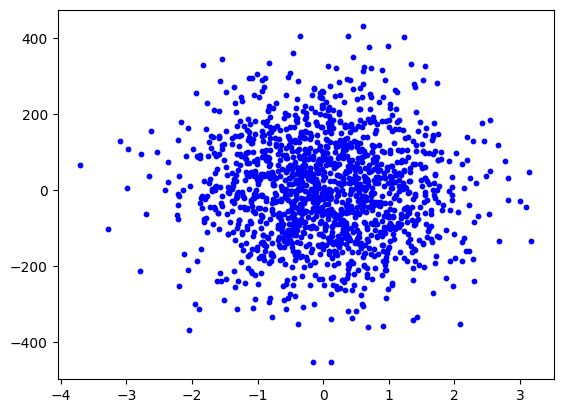

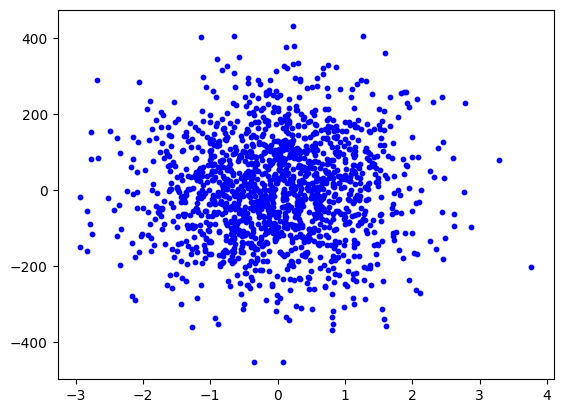

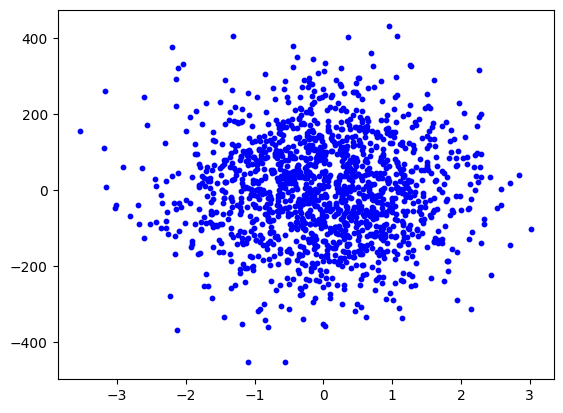

In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Get the indices sorted by most important to least important
indices = np.argsort(fs.scores_)[::-1]


# Now plot
for x in range(6):
    plt.figure()
    plt.scatter(X[:, indices[x]], y, s=10, c='b', label=f'{x}')
    
    plt.show()
